**Chapter 18**: Barplots!

In [1]:
from scipy import stats
import statistics as stat
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*Barplots in Seaborn: Good visualization - https://seaborn.pydata.org/generated/seaborn.barplot.html*

*This link gives you all sorts of details of how to code barplots, along with other functions in Seaborn. SUPER HELPFUL!*

**Barplots** are **DIFFERENT from histograms**. We are doing the following:

**x-axis**: categorical variable, and splitting up each category into a bar
**y-axis**: numerical variable, splitting up the values into each category in the x-axis

**TOP OF BARS**: This is the *mean, median*, or other *statistic* to help us see the difference between each category. Automatically, the mean is shown unless specified otherwise.
**NOTE**: This is NOT the count or number of values.

**Lines**: These are **CONFIDENCE INTERVALS** for the mean. Reference our lecture on confidence intervals.

If confidence intervals (lines) seem to **overlap** at all, then we *cannot be confident that the two categories are different*, EVEN IF the means are at different levels

If confidence intervals are **FAR from each other** with **NO overlap**, then we can say WITH CONFIDENCE that the **categories are different** for that numerical variable.

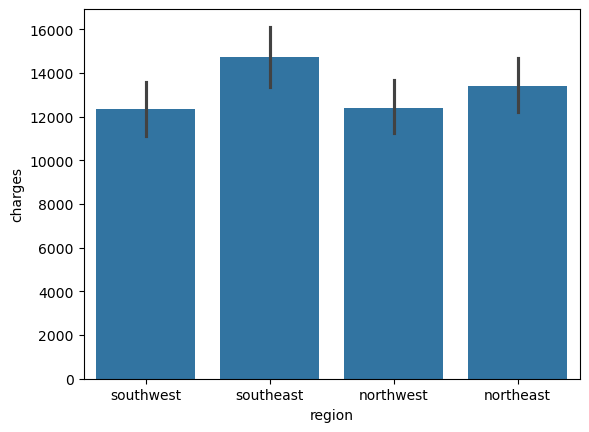

In [2]:
import seaborn as sns

sns.barplot(data=df, x="region", y="charges"); 

# Use the ; to get rid of some extra text

*Do the above confidence intervals overlap? Or are any separate?* It's hard to tell, **so run ANOVA** to get a p-value. (Refer to Chapter 17 lectures)

Confidence intervals use **standard error**, NOT standard deviation/variance

What's the difference?
* **Standard Error** is based on a *sample*
* **Standard Deviation** is based on an entire *population*

*Example*:
* Sample - Group of students randomly selected on campus (or volunteers)
* Population - Entire student body

**THREE VARIABLES**: 2 categorical, 1 numerical

*NOTE*: HUE only works on a categorical variable. Although there may be a way to place multiple variables in HUE, all the documentation I have seen for Seaborn does not specify.

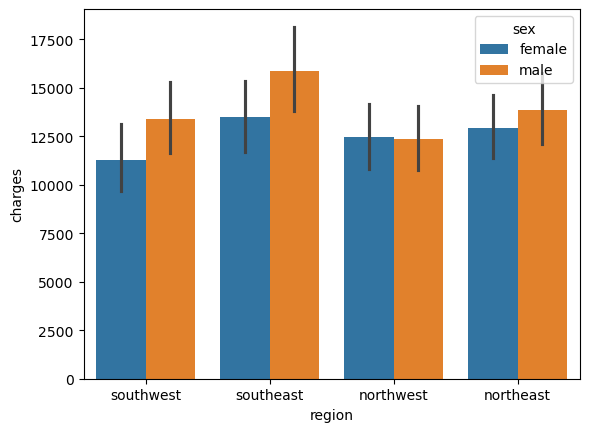

In [3]:
sns.barplot(data=df, x="region", y="charges", hue='sex');

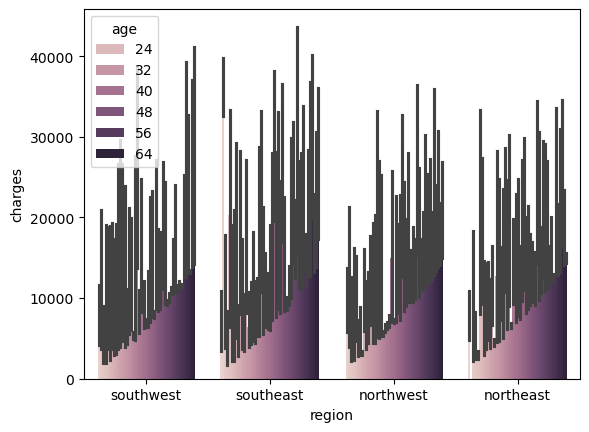

In [19]:
sns.barplot(data=df, x="region", y="charges", hue='age');

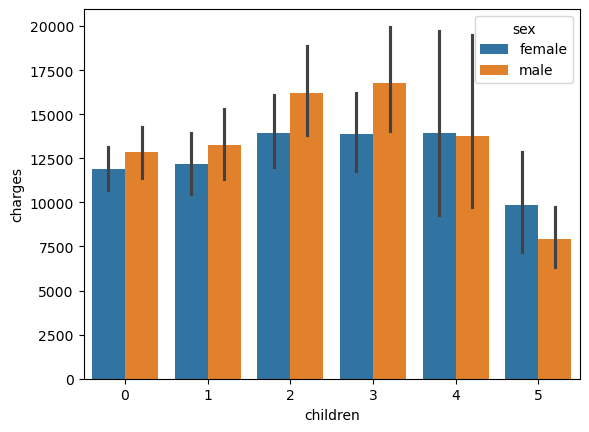

In [16]:
sns.barplot(data=df, x="children", y="charges", hue='sex');

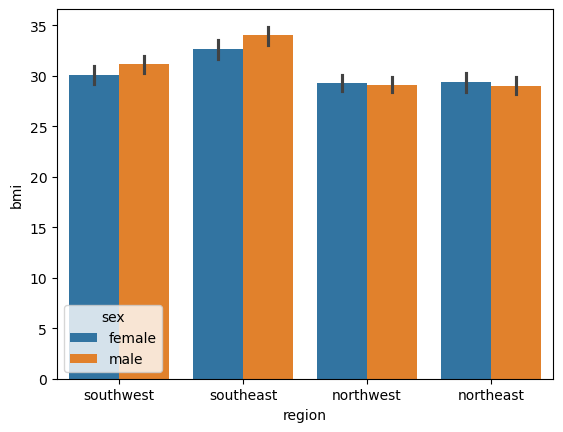

In [17]:
sns.barplot(data=df, x="region", y="bmi", hue='sex');

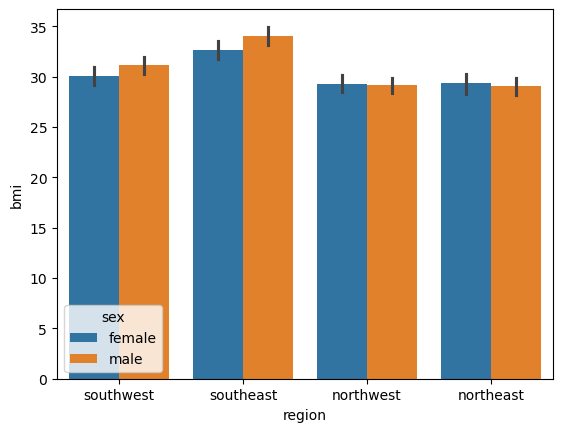

In [18]:
sns.barplot(data=df, x="region", y="bmi", hue='sex');

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Categorical**: REGION <br>
**Numerical**: BMI

These CI's are extremely separate! If you remember the previous lecture, ANOVA for these two variables gave an **extremely low p-value**. 

*REMEMBER*: ANOVA test to see if *any two categories* are significantly different. The barplot below helps VISUALIZE and distinguish which categories are actually different.

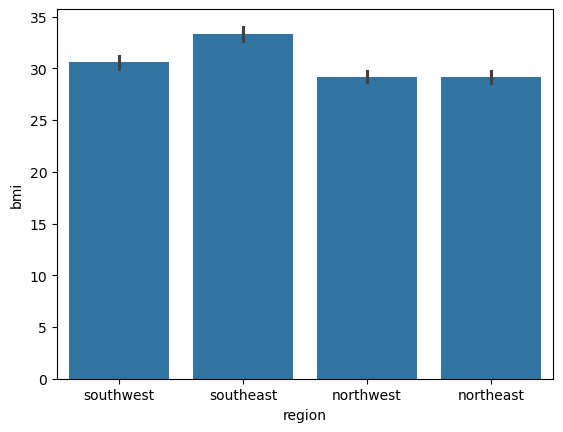

In [4]:
sns.barplot(data=df, x="region", y="bmi");

# Which regions can we confidently say have DIFFERENT BMI? Which regions are too close to call?

**Median**: We can do barplots with the Median as well, if we think that the mean is unreliable (multiple outliers, etc.)

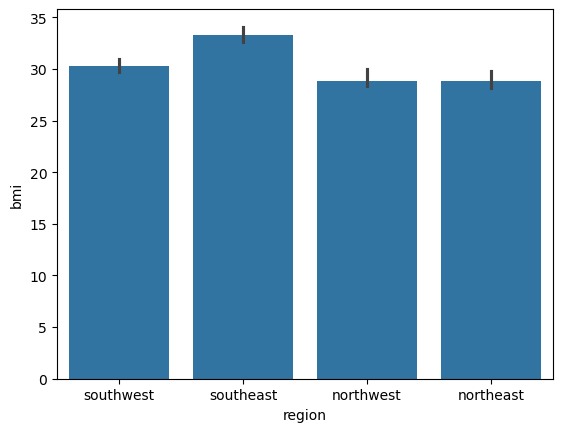

In [5]:
from numpy import median

sns.barplot(data=df, x="region", y="bmi", estimator=median);

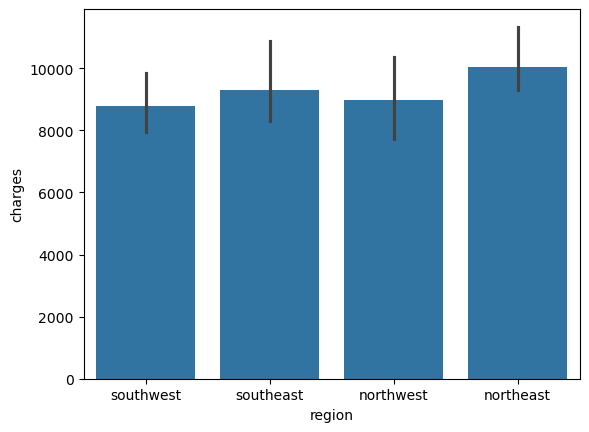

In [6]:
sns.barplot(data=df, x="region", y="charges", estimator=median);

# Notice how we get a DIFFERENT idea than region vs. charges for mean. Why? 
# (Could be multiple reasons, such as extreme charges in the deep south, but as the analyst, that is up to you to find)

**PAIR COMPARISONS**: The barplots above are difficult to see for sure if any two regions are actually different in charges to insurance. ANOVA only tells us if there is a difference SOMEWHERE between two regions. So how can we tell WITH CONFIDENCE that two specific regions are different?

If we ran a bunch of t-tests, we would run into issues in calculating our p-value (see book for explanation)

**TUKEY**: Plug-and-chug, and you will get the following for EACH PAIR:

**Mean Difference (meandiff):** Every value in each category is subtracted from each other to get a whole list of differences. THEN the mean of all those differences is taken.

**Adjusted P-value (p-adj):** 0.05 is still our cutoff (threshold, or 95%), but adjusted means that p-value is calculated slightly differently to make up for the number of comparisons. 

**Lower/Upper**: CONFIDENCE INTERVAL upper and lower bounds of the MEAN DIFFERENCE (NOT the mean). If the upper and lower are BOTH positive or negative, then the CI of the MEAN DIFFERENCE does NOT contain 0. This means we can be 95% confident that there is a difference between the two categories.

**Reject**: For our sake, it's just an easy way to point out which p-values < 0.05. 

*NOTE*: YOU STILL NEED TO SEE THE OUTPUT YOURSELF. DO NOT RELY SOLELY ON THE REJECT COLUMN. Notice some p-values are very close to 0.05, which means they are still worth paying attention to.

In [7]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df.charges, df.region)
print(mc.tukeyhsd())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


In [8]:
mc = MultiComparison(df.bmi, df.region)
print(mc.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


*Explanation of Adjusted P-values*: basically, the more comparisons being analyzed at once ==> the increased need to lower the p-value cut-off (as in, the magic number is no longer 0.05, but 0.01, 0.001, and lower)

https://www.graphpad.com/support/faq/adjusted-p-values-as-part-of-multiple-comparisons/#:~:text=The%20adjusted%20P%20value%20is,of%20the%20multiple%20comparison%20testing.

**BONFERRONI**

*Tukey Adjusted p-values*: the calculation takes into account multiple comparisons already, so our cut-off remains the same

*Bonferroni Adjusted p-values*: we need to adjust our magic number of 0.05 to accomodate the multiple comparisons. This means, our cut-off p-value is much lower than 0.05.

With 6 comparisons, our **new p-value cut-off ("threshold") = 0.05/6 = 0.0083**

In [9]:
# Create a unique list of Education levels
e_types = df.region.unique()
ttests = []

# Loop through that list
for i, e_t in enumerate(e_types):        # Use the enumerate() function to add an index for counting to a list of values
                                         # For each item, loop through a second list of each item to compare each pair
    for i2, e_t2 in enumerate(e_types):
        if i2 > i:                    # If the inner_index is greater that the outer_index, then go ahead and run a t-test
            type_1 = df[df.region == e_t]
            type_2 = df[df.region == e_t2]
            t, p = stats.ttest_ind(type_1['bmi'], type_2['bmi'])
      
      # Add each t-test result to a list of t, p pairs
            ttests.append([e_t + ' - ' + e_t2, t.round(4), p.round(4)])

      # Let's also print them out just to make sure it's working
            print(f'{e_t}/{e_t2}: t: {round(t, 2)}, p: {round(p, 2)}')
      
# The new threshold for statistical significant = 0.05 / length of the ttests list
p_threshold = 0.05 / len(ttests)
print(f'\nT-tests below p-value threshold: {p_threshold}')

# Now let's iterate through the results list and print only those that are significant based on the new threshold
for pair in ttests:
    if pair[2] <= p_threshold: # The p-value is in the second index, hence 1
        print(pair)

southwest/southeast: t: -5.91, p: 0.0
southwest/northwest: t: 3.28, p: 0.0
southwest/northeast: t: 3.12, p: 0.0
southeast/northwest: t: 9.26, p: 0.0
southeast/northeast: t: 8.79, p: 0.0
northwest/northeast: t: 0.06, p: 0.95

T-tests below p-value threshold: 0.008333333333333333
['southwest - southeast', -5.9084, 0.0]
['southwest - northwest', 3.2844, 0.0011]
['southwest - northeast', 3.1169, 0.0019]
['southeast - northwest', 9.2565, 0.0]
['southeast - northeast', 8.7909, 0.0]


PLUG-and-CHUG your variables into the above code, then that's it! Make sure you change ALL of the variables.